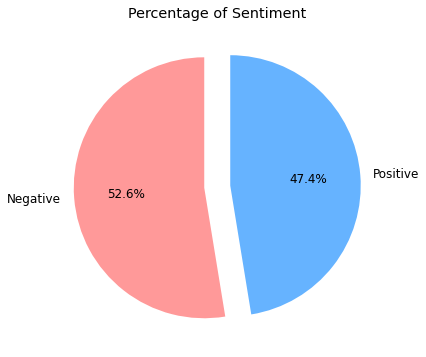

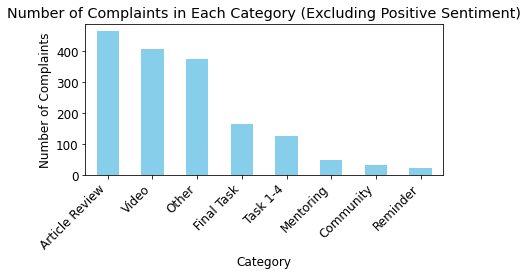

In [11]:
#Stage 1: Sentiment, Category
import pandas as pd
import csv
import re
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Load data with specified delimiter, header row, and encoding
try:
    complaints_data = pd.read_csv('lms.csv', sep=';', quoting=csv.QUOTE_MINIMAL, error_bad_lines=False, encoding='latin1')
except FileNotFoundError:
    print("Error: File 'lms.csv' not found.")
except pd.errors.EmptyDataError:
    print("Error: File 'lms.csv' is empty.")

# Text Preprocessing for Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    return text

text_column = 'Masukan dan Saran'  # Replace 'your_column_name' with the actual column name

# Check if text column exists in the DataFrame
if text_column in complaints_data.columns:
    # Fill empty values or whitespaces with 'ok'
    complaints_data[text_column] = complaints_data[text_column].fillna('ok')
    # Apply enhanced text preprocessing
    complaints_data[text_column] = complaints_data[text_column].apply(lambda x: preprocess_text(x))
else:
    print(f"Error: '{text_column}' column not found in DataFrame. Check your CSV file and column names.")

# Categorize data into appropriate problem categories
CATEGORY_MAPPING = {
    'Video': ['company coaching','vidio', 'rekaman waktu video coaching', 'pembawaan presentasi', 'materi lewat video', 'presentasi', 'video', 'tutorial video', 'rekaman', 'kualitas video'],
    'Article Review': ['modul','module','materi bisa lebih', 'e-learning', 'dokumen', 'article review', 'pdf', 'materi', 'bahasa', 'review', 'article', 'tutorial', 'panduan', 'reading'],
    'Reminder': ['h-1', 'direminder', 'pemberitahuan', 'pemberitahuan live mentoring', 'reminder', 'pengingat', 'jadwal', 'deadline', 'email', 'e-mail'],
    'Mentoring': ['pengajaran','mentoring', 'gaya mengajar', 'gaya', 'bimbingan', 'tutorial langsung', 'durasi mentoring'],
    'Final Task': ['praktik','praktek','kuis','projek', 'template', 'bagian akhir', 'final project', 'project', 'final', 'tool', 'tools', 'proyek akhir', 'pekerjaan akhir', 'studi kasus', 'case study', 'case'],
    'Task 1-4': ['task', 'checklist', 'ujian', 'berikan task', 'weekly task', 'task yang tidak ada dalam materi', 'tolong berikan tugas', 'perbanyak task', 'banyak task', 'penugasan', 'soal', 'tugas', 'pengerjaan', 'problem set', 'task kurang', 'tugas kurang', 'tidak singkron', 'intruksi tugas', 'petunjuk pengerjaan tugas'],
    'Community': ['berbagi','ruang','respon', 'engagement', 'networking', 'discord', 'telegram', 'grup', 'komunitas', 'forum', 'kelompok', 'diskusi', 'karir']
}

# New category mapping for 'positive' and 'negative'
CATEGORY_MAPPING_2 = {
    'Negative': ['hilang','bingung','perbanyak','susah','saran','buat','beri','update','upgrade','no improvement','perlu','ngaret','memperbaiki','diganti','gantikan','ditampilin','tampilkan','tampilin','diutamain','diutamakan','utamain','utamakan','harap','perjelas','harusnya','harus','kedepannya','perbaiki','slow','tolong','lebih','butuh','tingkatkan','payah','lain kali','buruk','maybe', 'instead', 'seharusnya', 'terkadang', 'error', 'eror', 'mungkin bisa', 'menyesal', 'rugi', 'sedih', 'kesal', 'jika', 'andai', 'harusnya', 'kecewa', 'perbaiki', 'diperbaiki','kesel'],
    'Positive': ['positif','lengkap','pertahankan','sudah sangat baik','sudah baik','puas','sangat puas','on time','pertahankan','sesuai harapan','sesuai','memuaskan','', '      ', 'cukup', 'berharga', 'yang baik', 'bersemangat', 'tidak ada', 'baik', 'keren', 'bagus', '-', ' ', 'terimakasih', 'ok', 'oke', 'nope', 'sip', 'membantu', 'good', 'good work']
}

def categorize_sentiment(text):
    for sentiment, keywords in CATEGORY_MAPPING_2.items():
        for keyword in keywords:
                return sentiment
    return 'Other'

NEGATION_WORDS_2 = ['belum', 'kurang']

def categorize_sentiment(text):
    for sentiment, keywords in CATEGORY_MAPPING_2.items():
        for keyword in keywords:
            # Check for negation and MAPPING_CATEGORY criteria
            if any(negation in word_tokenize(text.lower()) and keyword in text.lower() for negation in NEGATION_WORDS_2):
                return 'Negative'
            elif keyword in text.lower():
                return sentiment
    return 'Other'

# Function to categorize the 'Category'
def categorize_category(text):
    for category, keywords in CATEGORY_MAPPING.items():
        if any(keyword in text.lower() for keyword in keywords):
            return category
    return 'Other'

# Add 'Sentiment' column
complaints_data['Sentiment'] = complaints_data[text_column].apply(categorize_sentiment)

# Add 'Category' column
complaints_data['Category'] = complaints_data[text_column].apply(categorize_category)

# Save the updated DataFrame to an Excel file
complaints_data.to_excel('processed_lms.csv.xlsx', index=False)

# Rename the first column to 'Batch'
complaints_data.columns.values[0] = 'Batch'

# Plotting
plt.rcParams['font.family'] = 'DejaVu Sans'  # Fallback to a system font if 'Roboto' is not found
plt.rcParams['font.size'] = 12

# Pie chart for Sentiment
sentiment_counts = complaints_data['Sentiment'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.1,) * len(sentiment_counts)  # Equal explosion for all slices
plt.figure(figsize=(10, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Percentage of Sentiment')
plt.show()

# Bar chart for Category excluding 'Positive'
category_counts = complaints_data[complaints_data['Sentiment'] != 'Positive']['Category'].value_counts()
category_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Complaints in Each Category (Excluding Positive Sentiment)')
plt.xlabel('Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [7]:
#Stage 2: Aspect
import pandas as pd
import csv
import re
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud

# Load data with specified delimiter, header row, and encoding
try:
    complaints_data = pd.read_csv('processed_lms.csv', sep=';', quoting=csv.QUOTE_MINIMAL, error_bad_lines=False, encoding='latin1')
except FileNotFoundError:
    print("Error: File 'processed_lms.csv' not found.")
except pd.errors.EmptyDataError:
    print("Error: File 'processed_lms.csv' is empty.")

# Text Preprocessing for Bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    return text

text_column = 'Masukan dan Saran'

# Check if text column exists in the DataFrame
if text_column in complaints_data.columns:
    complaints_data[text_column] = complaints_data[text_column].fillna('ok')
    complaints_data[text_column] = complaints_data[text_column].apply(lambda x: preprocess_text(x))
else:
    print(f"Error: '{text_column}' column not found in DataFrame. Check your CSV file and column names.")

# Categorize data into appropriate problem categories
CATEGORY_MAPPING = {
            'Bahasa': ['terjemahan', 'translate', 'inggris','bahasa'],
            'Kurikulum': ['up-to-date','up to date', 'mengerti', 'sulit','paham','materi'],
            'Presentasi': ['presentasi', 'pemaparan'],
            'Kualitas Video': ['video'],
            'Urutan Task': ['urutan task'],
            'Teknis Task': ['check box'],
            'Telegram': ['telegram'],
            'E-mail': ['mail'],
            'Website': ['web'],
            'Mentor': ['mentor'],
            'Durasi': ['timeline','time line''durasi', 'lama', 'cepat', 'deadline', 'telat'],
            'Project': ['project', 'proyek', 'study case','projek'],
            'Grup per Program': ['diskusi', 'grup', 'group'],
            'Admin': ['cs', 'cso', 'admin']
        }
# Function to categorize the 'Aspect'
def categorize_aspect(text):
    aspects = []
    for category, keywords in CATEGORY_MAPPING.items():
        if any(keyword in text.lower() for keyword in keywords):
            aspects.append(category)
    return ', '.join(aspects) if aspects else 'Other'

# Add 'Aspect' column
complaints_data['Aspect'] = complaints_data[text_column].apply(categorize_aspect)

# Save the updated DataFrame to an Excel file
complaints_data.to_excel('processed_lms_2.csv.xlsx', index=False)


Error: File 'processed_lms.csv' not found.
